In [49]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [50]:
# df = pd.read_csv("../datasets/error_analysis/auto_gpt3_gpt3_50_50_generations_merged.csv")
df = pd.read_csv("../datasets/error_analysis/baseline_zero_shot_gpt3_50_50_merged.csv")
# df = pd.read_csv("../datasets/error_analysis/zero_shot_cot_50_50_merged.csv")



df.dropna(subset=['label', 'confidence'], inplace=True)


# drop all rows with no % in confidence or similarity column
df = df[df['confidence'].str.contains('%')]
df = df[df['similarity'].str.contains('%')]


confidences = df['confidence'].to_numpy()

similarities = df['similarity'].to_numpy()



# turn from % string into decimal
def convert_percentage(percentage):
    if isinstance(percentage, str):
        return float(percentage[:percentage.find("%")]) / 100
    elif isinstance(percentage, float):
        return percentage  # It's already a float, no conversion needed
    else:
        raise ValueError("Unexpected data type in 'confidence' column")

# Apply the conversion function to each value in the 'confidence' column
confidences = np.array([convert_percentage(confidence) for confidence in confidences])

similarities = np.array([convert_percentage(similarity) for similarity in similarities])

print(confidences)

labels = df['label'].to_numpy()

# if True turn to 1 else 0
labels = np.where(labels == True, 1, 0)

print(labels)

[0.5  0.8  0.9  0.9  0.9  0.8  0.9  0.8  0.8  0.95 0.9  0.7  1.   0.9
 0.9  1.   0.8  0.85 0.7  0.8  1.   0.95 0.8  0.9  0.9  0.2  0.4  0.7
 0.5  0.7  0.   0.4  0.8  0.8  0.7  0.4  0.4  0.   0.5  0.5  0.7  0.5
 0.3  0.8  0.5  0.5  0.   0.7  0.4  0.7  0.8  0.7  0.5  0.5  0.5  0.8
 0.7  0.8  0.7  0.5  0.8  0.7  1.   0.5  0.7  0.8  0.7  0.4  0.2  0.5
 0.7  0.5  0.5  0.8  0.5  0.5  0.8  0.5  0.5  0.3  0.8  0.8  0.7  0.9
 0.7  0.8  0.8  0.7  0.85 0.7  0.8  0.7  0.7  0.5  0.7  0.7  0.9  0.5
 0.8  0.7  0.5  0.4  0.9  0.7  0.8  0.8  0.   0.   0.4  0.5  0.5  0.7
 0.7  0.5  0.95 0.5  0.85 0.7  0.3  0.5  0.5  0.4  0.   0.7  1.   0.5
 0.5  1.   0.8  0.7  0.9  0.5  0.5  0.7  0.2  0.5  0.7  0.5  0.7  0.8
 0.5  0.4  0.5  0.8  0.7  0.8  0.5  0.8  0.5  0.5  0.5  0.5  0.5  0.7
 0.95 0.5  0.8  0.95 0.7  0.5  0.8  0.5  0.7  0.5  0.7  0.7  0.4  0.8
 0.7  0.5  0.5  0.5  0.5  0.8  0.7  0.5  0.7  0.2  0.   0.5  0.7  0.8
 0.7  0.7  0.7  0.8  0.5  0.8  0.7  0.5  0.7  0.4  0.7  0.5  1.   0.8
 0.8  0.8  0.7  0.7 

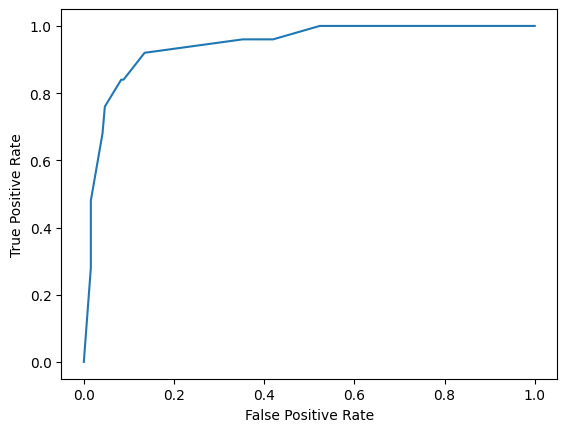

In [51]:

fpr, tpr, _ = metrics.roc_curve(labels,  similarities)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
